# Exploratory data analysis

In [1]:
!pip3 install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.preprocessing import OneHotEncoder

In [3]:
data, meta = arff.loadarff('autos.arff')

In [4]:
converters = dict()
_ = [converters.update({column:dtype}) for column,dtype in zip(meta.names(),meta.types())]

In [5]:
df = pd.DataFrame(data=data, columns=meta.names())

In [6]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',88.6,168.8,...,b'mpfi',3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,b'3'
1,NaN,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',88.6,168.8,...,b'mpfi',3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,b'3'
2,NaN,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',94.5,171.2,...,b'mpfi',2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,b'1'
3,164.0,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',99.8,176.6,...,b'mpfi',3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,b'2'
4,164.0,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',99.4,176.6,...,b'mpfi',3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,b'2'


In [7]:
# Show some info to gather some information about different column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null float64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             20

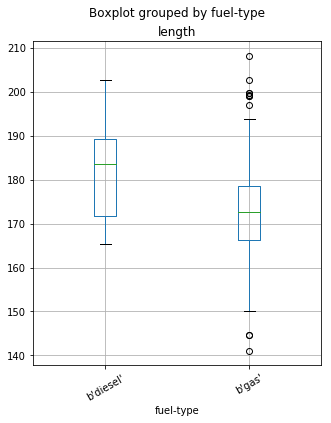

In [8]:
# Here, I plot a boxplot of the legth column with respect to the two fuel-types of the autos from diesel and gas.
df.boxplot('length','fuel-type',rot = 30,figsize=(5,6))

In [9]:
# Copy in order to deal with categorical data only
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling
0,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'mpfi',b'3'
1,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'mpfi',b'3'
2,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',b'ohcv',b'six',b'mpfi',b'1'
3,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',b'ohc',b'four',b'mpfi',b'2'
4,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',b'ohc',b'five',b'mpfi',b'2'


In [10]:
# Cheking for null values. Get total number of missing values
print(cat_df.isnull().values.sum())
# It seems like there are no missing values. 
# In other case: print(cat_df.isnull().sum()) to get features which has missing values.
# Once I know which feature has missing values, use fillna()

0


In [11]:
# the frequency distribution of categories within the feature
print(cat_df['make'].value_counts())

b'toyota'           32
b'nissan'           18
b'mazda'            17
b'mitsubishi'       13
b'honda'            13
b'subaru'           12
b'volkswagen'       12
b'peugot'           11
b'volvo'            11
b'dodge'             9
b'bmw'               8
b'mercedes-benz'     8
b'audi'              7
b'plymouth'          7
b'saab'              6
b'porsche'           5
b'isuzu'             4
b'chevrolet'         3
b'alfa-romero'       3
b'jaguar'            3
b'renault'           2
b'mercury'           1
Name: make, dtype: int64


In [12]:
# the frequency distribution of categories within the feature
print(cat_df['aspiration'].value_counts())

b'std'      168
b'turbo'     37
Name: aspiration, dtype: int64


In [13]:
# the frequency distribution of categories within the feature
print(cat_df['body-style'].value_counts())

b'sedan'          96
b'hatchback'      70
b'wagon'          25
b'hardtop'         8
b'convertible'     6
Name: body-style, dtype: int64


In [14]:
# the frequency distribution of categories within the feature
print(cat_df['fuel-system'].value_counts())

b'mpfi'    94
b'2bbl'    66
b'idi'     20
b'1bbl'    11
b'spdi'     9
b'4bbl'     3
b'mfi'      1
b'spfi'     1
Name: fuel-system, dtype: int64


In [15]:
# To know the count of distinct categories within the feature
print(cat_df['fuel-system'].value_counts().count())

8


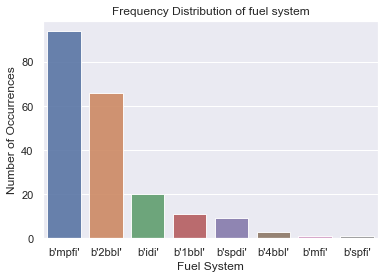

In [18]:
fuel_system_count = cat_df['fuel-system'].value_counts()
sns.set(style="darkgrid")
sns.barplot(fuel_system_count.index, fuel_system_count.values, alpha=0.9)
plt.title('Frequency Distribution of fuel system')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Fuel System', fontsize=12)
plt.show()

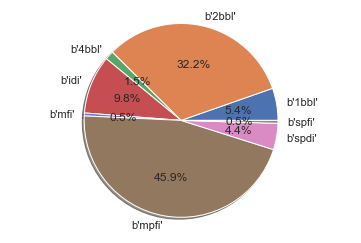

In [19]:
labels = cat_df['fuel-system'].astype('category').cat.categories.tolist()
counts = cat_df['fuel-system'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [22]:
cat_df_onehot = cat_df.copy()
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['fuel-system'], prefix = ['fuel-system'])
cat_df_onehot.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,symboling,fuel-system_b'1bbl',fuel-system_b'2bbl',fuel-system_b'4bbl',fuel-system_b'idi',fuel-system_b'mfi',fuel-system_b'mpfi',fuel-system_b'spdi',fuel-system_b'spfi'
0,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'3',0,0,0,0,0,1,0,0
1,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'3',0,0,0,0,0,1,0,0
2,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',b'ohcv',b'six',b'1',0,0,0,0,0,1,0,0
3,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',b'ohc',b'four',b'2',0,0,0,0,0,1,0,0
4,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',b'ohc',b'five',b'2',0,0,0,0,0,1,0,0


In [16]:
#df.dtypes.unique()

In [17]:
#df.pivot(columns='make',values='make').add_prefix('Make').reset_index()
#df.head()

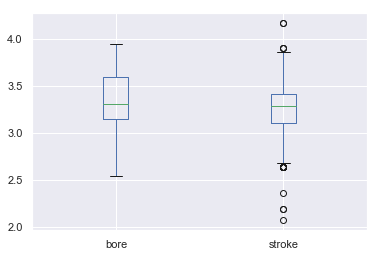

In [23]:
boxplot = df.boxplot(column=['bore', 'stroke'])